# Boosting and Stacking

# Table of Contents
    - Problem Description
    - Dataset understanding
    - Error metric ?
    - Loading required libraries
    - Check the top 5 rows to glance the dataset
    - Check the dimensions and type
    - Print column names and check the datatypes of columns
    - Check the summary of the dataframe
    - Target Distribution
    - TypeCasting of attributes
    - Remove the unncessary Columns
    - Check for Missing values
    - Split the data into train and test
    - Split the attributes into numerical and categorical types
    - Imputation
    - Imputing missing values with mean or median
    - DataFrameMapper
        - Standardize the numerical attributes
        - One Hot Encoding of categorical attributes
    - Model Building
    - Adaboost-decision tree Classifier
    - GBM (Gradient Boosting Machine)
    - XGBoost (Extreme Gradient Boosting)
    - Stacking

### Problem Statement: 

#### Tennis Australia open is trying to better automate how tennis points get categorized into three outcomes – winners, forced errors and unforced errors.

### Dataset Description:


The dataset includes point outcomes of rallies only (where the number of shots hit exceeds two, which represents the serve and return). All points were played at a past Australian Open.

* https://www.crowdanalytix.com/contests/from-ao-to-ai--predicting-how-points-end-in-tennis

### Target variable

#### _Outcome_ - 3 classes
* Winner – the point winning player hits a shot that is not touched by the opponent
* Forced error – the point winning player hits a shot that causes the opponent to not be able to return it, i.e. a good shot that is hard to handle
* Unforced error – the player attempting to return the ball makes an error on an otherwise normal looking rally shot

### Atributes Description

* __rally__ - The number of shots in the point counting serves and point-ending shot.  An integer from 1, 2, 3...
* __serve__ - A number indicating whether the point was played on a first or second serve.  1 = First, 2 = Second
* __hitpoint__ - Shot category for point-ending shot.  F = Forehand, B = Backhand, V = Volley, U = Unknown
* __speed__ - Speed of point-ending shot.  Continuous (m/s)
* __net.clearance__ - Distance above the net as point-ending shot passed the net.  Continuous (cm) distance above net. Can be negative if shot did not pass above the net.
* __distance.from.sideline__ - Lateral distance of the point-ending shot bounce from the nearest singles sideline. Perpendicular distance in meters (always positive even if out)
* __depth__ - Distance of the point-ending shot bounce from the baseline.  Perpendicular distance in meters (always positive even if out)
* __outside.sideline__ - Logical indicator of whether point-ending shot landed outside of the in-play singles sideline    TRUE, FALSE
* __outside.baseline__ - Logical indicator of whether point-ending shot landed beyond the in-play baseline.       TRUE, FALSE
* __player.distance.travelled__ - Distance player who made the point-ending shot travelled between the impact of the penultimate shot and the impact of the point-ending shot.  Euclidean distance in meters
* __player.impact.depth__ - Distance of player who made point-ending shot from the net at the time the point-ending shot was made.  Perpendicular distance along the length of court from net in meters
* __player.impact.distance.from.center__ - Distance of player who made point-ending shot from the center line at the time the point-ending shot was made.  Perpendicular distance from the center line in meters
* __player.depth__ - Distance of player who made point-ending shot from the net at the time the penultimate shot was made.  Perpendicular distance along the length of court from net in meters
* __player.distance.from.center__ - Distance of player who made point-ending shot from the center line at the time the penultimate shot was made.  Perpendicular distance from the center line in meters
* __opponent.depth__ - Distance of opponent from the net at the time the penultimate shot was made.  Perpendicular distance along the length of court from net in meters
* __opponent.distance.from.center__ - Distance of opponent from the center line at the time the penultimate shot was made.  Perpendicular distance from the center line in meters
* __same.side__ - Logical indicator if both player and opponent were positioned on the same side of the center line (ad or deuce court) at the time the penultimate shot was made.  TRUE, FALSE
* __previous.speed__ - Speed of penultimate shot.  Continuous (m/s)
* __previous.net.clearance__ - Distance above the net as penultimate shot passed the net.  Continuous (cm) distance above net. Can be negative if shot did not pass above the net.
* __previous.distance.from.sideline__ - Lateral distance of the penultimate shot bounce from the nearest singles sideline.   Perpendicular distance in meters (always positive even if out)
* __previous.depth__ - Distance of the penultimate shot bounce from the baseline.  Perpendicular distance in meters (always positive even if out)
* __previous.hitpoint__ - Shot category for penultimate shot.  F = Forehand, B = Backhand, V = Volley, U = Unknown
* __previous.time.to.net__ - Time for penultimate shot to be hit and pass the net - Continuous number in seconds
* __server.is.impact.player__ - Logical if player who made point-ending shot was the server of the point.  TRUE, FALSE
* __outcome__ - Target variable, character with three categories indicating the type of shot that ended the point.    W (Winner), FE (Forced Error), UE (Unforced Error)
* __id__ - A 10-character unique identifier for the point.  Character


### Installing XGBoost:
* Execute below command in terminal

sudo conda install -c conda-forge xgboost

### Import required libraries

In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install sklearn-pandas

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("tennis.csv")

#### See the top 5 rows of the data

In [ ]:
data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


#### Dimension of data

In [ ]:
data.shape

(8001, 27)

#### Different classes in Outcome variable

In [ ]:
data.outcome.unique()

array(['UE', 'FE', 'W'], dtype=object)

#### Distribution of target (outcome) variable

In [ ]:
data.outcome.value_counts()

UE    3501
W     2682
FE    1818
Name: outcome, dtype: int64

In [ ]:
data.outcome.value_counts(normalize= True)*100

UE    43.75703
W     33.52081
FE    22.72216
Name: outcome, dtype: float64

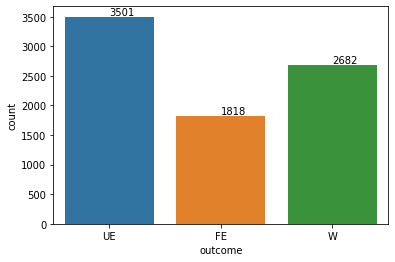

In [ ]:
y_count=sns.countplot(x='outcome',data=data)        
# Shows the count of observations in each categorical bin using bars

for p in y_count.patches:
    height = p.get_height()
    # Add text to the axes
    y_count.text(p.get_x()+p.get_width()/2, height + 30, height)
# The y_count.text method takes an x position, a y position and a string

#### Check the number of columns

In [ ]:
len(data.columns)

27

#### Display data type of each variable

In [ ]:
data.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline                         bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

#### Check the number of unique levels

In [ ]:
data.nunique()

rally                                   30
serve                                    2
hitpoint                                 4
speed                                 8001
net.clearance                         7994
distance.from.sideline                8001
depth                                 8001
outside.sideline                         2
outside.baseline                         2
player.distance.travelled             7988
player.impact.depth                   7089
player.impact.distance.from.center    6644
player.depth                          6882
player.distance.from.center           5977
previous.speed                        8001
previous.net.clearance                8001
previous.distance.from.sideline       8001
previous.depth                        8001
opponent.depth                        6856
opponent.distance.from.center         6775
same.side                                2
previous.hitpoint                        4
previous.time.to.net                  8001
server.is.i

#### Identifying categorical attributes

In [ ]:
categorical_list = ["serve","hitpoint","outside.sideline",
                    "outside.baseline","same.side",
                    "previous.hitpoint",
                    "server.is.impact.player",
                    "gender","outcome"]

#### Converting to appropriate datatype

In [ ]:
data[categorical_list] = data[categorical_list].astype("category")

#### Display data type of each variable after conversion

In [ ]:
data.dtypes

rally                                    int64
serve                                 category
hitpoint                              category
speed                                  float64
net.clearance                          float64
distance.from.sideline                 float64
depth                                  float64
outside.sideline                      category
outside.baseline                      category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitp

#### Check the distribution of all categorical attributes

In [ ]:
for i in categorical_list:
    print(i)
    print("\n")
    print(data[i].value_counts(normalize=True)*100)
    print("--------------------------------------------")

serve


1    60.129984
2    39.870016
Name: serve, dtype: float64
--------------------------------------------
hitpoint


F    55.018123
B    37.920260
U     5.361830
V     1.699788
Name: hitpoint, dtype: float64
--------------------------------------------
outside.sideline


False    81.239845
True     18.760155
Name: outside.sideline, dtype: float64
--------------------------------------------
outside.baseline


False    79.740032
True     20.259968
Name: outside.baseline, dtype: float64
--------------------------------------------
same.side


False    75.44057
True     24.55943
Name: same.side, dtype: float64
--------------------------------------------
previous.hitpoint


F    46.044244
B    40.969879
V     8.998875
U     3.987002
Name: previous.hitpoint, dtype: float64
--------------------------------------------
server.is.impact.player


True     58.367704
False    41.632296
Name: server.is.impact.player, dtype: float64
--------------------------------------------
gender


mens  

#### Checking the length of ID column

In [ ]:
data['ID'].nunique()

8001

In [ ]:
data.shape

(8001, 27)

#### Dropping ID column as it is not significant

In [ ]:
data.drop(["ID"], axis=1, inplace=True)
len(data.columns)

26

#### Display summary statistics 

In [ ]:
data.describe()

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,5.966004,30.806938,0.629658,1.467630,4.421146,2.690463,11.899694,1.919544,12.253954,1.213795,28.763676,0.821562,2.193420,4.218717,12.616810,2.367952,0.549988
std,3.548182,7.298917,0.982504,1.108697,3.144965,1.713136,2.788231,1.205449,2.039085,0.964364,6.477470,0.674663,1.038942,2.052946,2.075401,1.313927,0.186788
min,3.000000,5.176078,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201
25%,3.000000,26.770290,-0.027092,0.539500,1.641161,1.444233,11.221400,0.942400,11.374200,0.551800,24.033218,0.404815,1.354458,2.733674,12.082400,1.352200,0.432164
50%,5.000000,32.417690,0.445870,1.210847,3.860266,2.360894,12.691800,1.829400,12.551600,0.983800,29.793417,0.658382,2.168822,4.126864,12.901600,2.332000,0.507559
75%,7.000000,35.681431,0.970844,2.215955,7.029345,3.565853,13.553000,2.745200,13.498000,1.596600,33.581003,1.021397,3.022677,5.595515,13.712800,3.259000,0.624135
max,38.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257


In [ ]:
data.describe(include=['category'])

,serve,hitpoint,outside.sideline,outside.baseline,same.side,previous.hitpoint,server.is.impact.player,outcome,gender
count,8001,8001,8001,8001,8001,8001,8001,8001,8001
unique,2,4,2,2,2,4,2,3,2
top,1,F,False,False,False,F,True,UE,mens
freq,4811,4402,6500,6380,6036,3684,4670,3501,4005


#### Checking for null values

In [ ]:
data.isnull().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
outcome                               0


#### Observation: There are no null values

#### Divide the data into train and test

In [ ]:
y=data["outcome"]
X=data.drop('outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5600, 25)
(2401, 25)
(5600,)
(2401,)


#### Display all the columns

In [ ]:
data.columns

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'outcome', 'gender'],
      dtype='object')

#### Creating list of numerical and categorical attributes

In [ ]:
numeric_list = ['rally','speed','net.clearance',
                'distance.from.sideline','depth',
                'player.distance.travelled','player.impact.depth',
                'player.impact.distance.from.center',
                'player.depth','player.distance.from.center',
                'previous.speed','previous.net.clearance',
                'previous.distance.from.sideline','previous.depth',
                'opponent.depth','opponent.distance.from.center',
                'previous.time.to.net']

categorical_list = ['serve','hitpoint','outside.sideline',
                    'outside.baseline','same.side',
                    'previous.hitpoint',
                    'server.is.impact.player',
                    'gender']

In [ ]:
len(numeric_list)

17

In [ ]:
len(categorical_list)

8

In [ ]:
data.dtypes

rally                                    int64
serve                                 category
hitpoint                              category
speed                                  float64
net.clearance                          float64
distance.from.sideline                 float64
depth                                  float64
outside.sideline                      category
outside.baseline                      category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitp

# DataFrameMapper

A DataFrameMapper operates on DataFrame objects created by the pandas package, and can apply transformations to certain parts of the dataframe (not necessarily on the entire data set). DataFrames are similar to numpy and scipy matrices, with a single noticeable difference of keeping track of row and column labels and metadata. DataFrames operations will make sure rows and columns can be accessed, manipulated and read using logical identifications instead of indices.

The first part of the DataFrameMapper transformation tuple describes which columns should be run through the transformation.

A DataFrameMapper is a more flexible tool, it'll let you execute different transformations on different columns and is more oriented to transforming complex data structures.

A DataFrameMapper will let you keep the annotations and labels you've assigned to your pandas DataFrame object.

In [ ]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in numeric_list] +
  [([categorical_col], OneHotEncoder()) for categorical_col in categorical_list]
, df_out=True)

In [ ]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [ ]:
mapper.fit(X_train)

X_train_std = mapper.transform(X_train)
X_test_std = mapper.transform(X_test)

In [ ]:
X_train_std.head()

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,same.side_x0_False,same.side_x0_True,previous.hitpoint_x0_B,previous.hitpoint_x0_F,previous.hitpoint_x0_U,previous.hitpoint_x0_V,server.is.impact.player_x0_False,server.is.impact.player_x0_True,gender_x0_mens,gender_x0_womens
1402,2.206016,1.121552,-0.730696,-0.175183,0.988152,-0.829916,1.120228,0.808667,1.526350,0.482096,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1544,4.136322,1.170424,0.163662,-0.862930,-1.148001,0.014953,1.102595,0.362499,0.702730,-1.249078,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1764,-0.000049,0.182863,0.532959,-1.015778,-1.404791,0.531566,0.340187,0.245007,0.377467,0.154493,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5718,-0.827324,0.245147,-0.189687,-0.771740,-0.467465,-0.234643,0.107888,0.884055,-0.367821,-0.410447,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7006,-0.827324,-0.396162,-0.647252,1.065523,0.586853,-1.105658,-0.557186,-0.463438,-1.017955,-0.630639,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test_std.head()

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,same.side_x0_False,same.side_x0_True,previous.hitpoint_x0_B,previous.hitpoint_x0_F,previous.hitpoint_x0_U,previous.hitpoint_x0_V,server.is.impact.player_x0_False,server.is.impact.player_x0_True,gender_x0_mens,gender_x0_womens
2949,-0.000049,1.915802,-0.209410,-0.993875,-1.313488,-1.414688,0.872303,0.124021,1.063491,1.115408,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6885,-0.827324,0.637883,-0.521776,0.027012,0.172605,-1.042676,-0.261741,-1.576280,-0.420140,-0.403837,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3079,-0.827324,1.285836,-0.255016,-0.385628,0.103080,-0.075567,0.665664,-1.426336,-0.452510,-0.730201,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6548,-0.827324,0.191722,-0.185242,-0.566945,-0.193971,-0.799147,0.413152,-0.663473,-0.165681,-0.730820,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5886,-0.827324,-0.623300,-0.431102,-0.535634,0.740060,-1.082177,0.277543,-0.569446,-0.176144,-0.177448,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
y_train.value_counts(normalize=True)*100

UE    43.750000
W     33.517857
FE    22.732143
Name: outcome, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

UE    43.773428
W     33.527697
FE    22.698875
Name: outcome, dtype: float64

### Defining Error Metrics

In [ ]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [ ]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

### Decision Trees

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt.fit(X_train_std, y_train)

y_pred_train = clf_dt.predict(X_train_std)
y_pred_test = clf_dt.predict(X_test_std)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
# print(classification_report(y_test,y_pred_test,digits=4))


Train Accuracy: 0.7889285714285714
Test Accuracy: 0.7638483965014577


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     0.7486    0.5405    0.6277      1273
          UE     0.7356    0.8824    0.8024      2450
           W     0.9001    0.8354    0.8665      1877

    accuracy                         0.7889      5600
   macro avg     0.7948    0.7528    0.7656      5600
weighted avg     0.7937    0.7889    0.7842      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.6904    0.4991    0.5793       545
          UE     0.7181    0.8630    0.7839      1051
           W     0.8804    0.8137    0.8457       805

    accuracy                         0.7638      2401
   macro avg     0.7630    0.7252    0.7363      2401
weighted avg     0.7662    0.7638    0.7582      2401



In [ ]:
print(confusion_matrix(y_test, y_pred_test))

[[272 232  41]
 [ 96 907  48]
 [ 26 124 655]]


In [ ]:
X_train_std.columns

Index(['rally', 'speed', 'net.clearance', 'distance.from.sideline', 'depth',
       'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'previous.time.to.net', 'serve_x0_1', 'serve_x0_2', 'hitpoint_x0_B',
       'hitpoint_x0_F', 'hitpoint_x0_U', 'hitpoint_x0_V',
       'outside.sideline_x0_False', 'outside.sideline_x0_True',
       'outside.baseline_x0_False', 'outside.baseline_x0_True',
       'same.side_x0_False', 'same.side_x0_True', 'previous.hitpoint_x0_B',
       'previous.hitpoint_x0_F', 'previous.hitpoint_x0_U',
       'previous.hitpoint_x0_V', 'server.is.impact.player_x0_False',
       'server.is.impact.player_x0_True', 'gender_x0_mens',
       'gender_x0_womens'],
      dtype='object')

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTrees",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.7582


## Random Forests

- Very simple yet very powerful machine learning algorithm
- As the name suggests: Builds a lot of trees within
- More robust for the obvious reasons
- We have a lot trees, thus lot pf predictions for the test class which enters, now the concept of majority voting.
- Can handle both classification and regression problems
- Extremely good to avoid overfitting

# Working

- Assume number of observations in training set is N. Then, sample of these N observations is taken at random but with replacement
- If the number of variables or features "m" we take square root of m features for node selection at each stage.
- There is no pruning done, trees are grown to the fullest depth
- New data is predicted by the majority voting method or averaging for regression problems

### Important Terminology
- Bagging or bootstrap aggregation
 - Randomly pick the dataset or sub sample the dataset but with replacement

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=X_train_std, y=y_train)

y_pred_train = clf_rf.predict(X_train_std)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test_std)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


Train Accuracy: 1.0
Test Accuracy: 0.8638067471886713


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     1.0000    1.0000    1.0000      1273
          UE     1.0000    1.0000    1.0000      2450
           W     1.0000    1.0000    1.0000      1877

    accuracy                         1.0000      5600
   macro avg     1.0000    1.0000    1.0000      5600
weighted avg     1.0000    1.0000    1.0000      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7915    0.7174    0.7526       545
          UE     0.8557    0.8744    0.8649      1051
           W     0.9172    0.9491    0.9328       805

    accuracy                         0.8638      2401
   macro avg     0.8548    0.8470    0.8501      2401
weighted avg     0.8617    0.8638    0.8622      2401



In [ ]:
print(confusion_matrix(y_test, y_pred_test))

[[391 132  22]
 [ 85 919  47]
 [ 18  23 764]]


In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218


#### Random Forest Parameters
* n_estimators is the number of trees in the forest
* max_depth is how deep each tree can be
* min_sample_leaf is the minimum samples required in each leaf node for the root node to split.
    "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf".


In [ ]:
## Use Grid Search for parameter tuning. (Exhaustive search over specified parameter values for an estimator)

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree

rfc_grid = RandomForestClassifier(n_jobs=-1,max_features='sqrt')
 
# Use a grid over parameters of interest

param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

##### GridSearchCV implements a “fit” and a “score” method. 

In [ ]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train_std, y = y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2, 4],
                         'n_estimators': [9, 18, 27, 36, 45, 54, 63]})

In [ ]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.8642857142857142 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 54}


In [ ]:
y_pred_train = rfc_cv_grid.predict(X_train_std)
y_pred_test = rfc_cv_grid.predict(X_test_std)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


Train Accuracy: 0.95125
Test Accuracy: 0.8533944189920867


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     0.9674    0.8861    0.9250      1273
          UE     0.9403    0.9637    0.9518      2450
           W     0.9558    0.9792    0.9674      1877

    accuracy                         0.9513      5600
   macro avg     0.9545    0.9430    0.9481      5600
weighted avg     0.9516    0.9513    0.9509      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7736    0.6771    0.7221       545
          UE     0.8422    0.8735    0.8575      1051
           W     0.9137    0.9466    0.9298       805

    accuracy                         0.8534      2401
   macro avg     0.8432    0.8324    0.8365      2401
weighted avg     0.8506    0.8534    0.8510      2401



In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest_BestParameters",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040


In [ ]:
clf_rf.feature_importances_

array([0.0096126 , 0.06661349, 0.14566692, 0.04444147, 0.06399029,
       0.03338505, 0.05801649, 0.02291058, 0.0266639 , 0.01884433,
       0.04579979, 0.02525726, 0.04214474, 0.03027921, 0.04180141,
       0.01964652, 0.06984535, 0.00275081, 0.00285684, 0.00326879,
       0.0029979 , 0.00132226, 0.00218883, 0.04865867, 0.0616006 ,
       0.04030303, 0.04366351, 0.00213017, 0.00221356, 0.00279562,
       0.0026737 , 0.0014033 , 0.00432297, 0.00242907, 0.00226417,
       0.00260405, 0.00263275])

In [ ]:
X_train_std.columns

Index(['rally', 'speed', 'net.clearance', 'distance.from.sideline', 'depth',
       'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'previous.time.to.net', 'serve_x0_1', 'serve_x0_2', 'hitpoint_x0_B',
       'hitpoint_x0_F', 'hitpoint_x0_U', 'hitpoint_x0_V',
       'outside.sideline_x0_False', 'outside.sideline_x0_True',
       'outside.baseline_x0_False', 'outside.baseline_x0_True',
       'same.side_x0_False', 'same.side_x0_True', 'previous.hitpoint_x0_B',
       'previous.hitpoint_x0_F', 'previous.hitpoint_x0_U',
       'previous.hitpoint_x0_V', 'server.is.impact.player_x0_False',
       'server.is.impact.player_x0_True', 'gender_x0_mens',
       'gender_x0_womens'],
      dtype='object')

In [ ]:
len(X_train_std.columns)

37

In [ ]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)
print(indices)

[21 31 27 22 28 34 33 35 36 30 17 29 18 20 19 32  0  9 15  7 11  8 13  5
 25 14 12 26  3 10 23  6 24  4  1 16  2]


In [ ]:
print(len(indices))

37


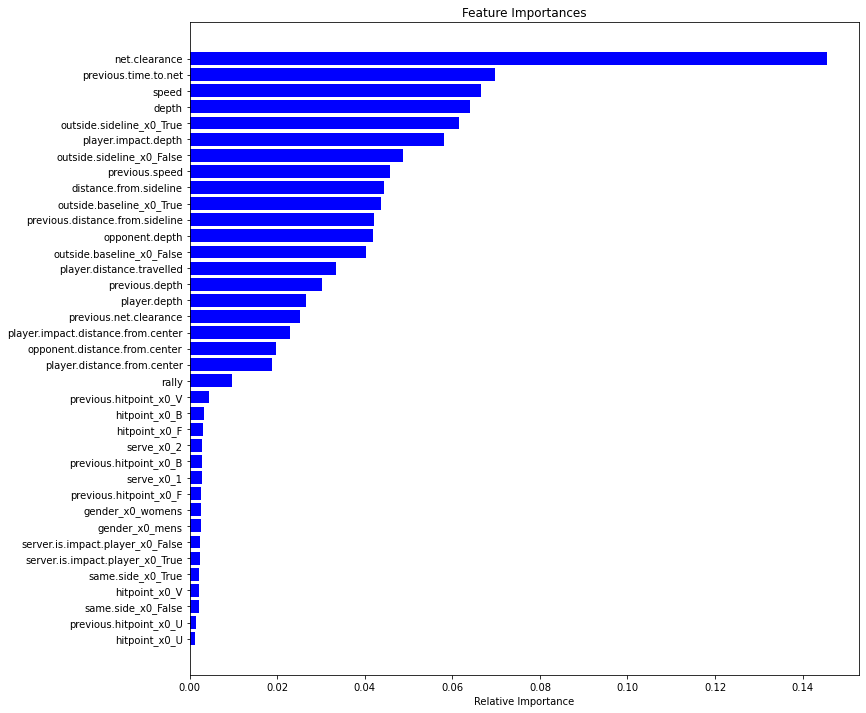

In [ ]:
%matplotlib inline
features = X_train_std.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

## Model Building

### Build AdaBoost Classifier

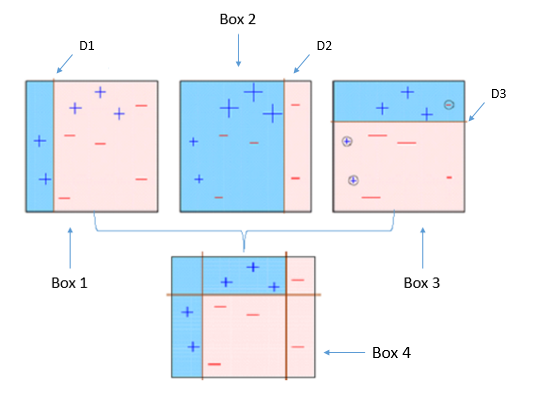

In [ ]:
Image(filename=r'bigd.png') 

### Getting Started
To begin with, a __weak classifier__ is trained, and __all of the example data samples are given an equal weight__. 

Once the initial classifier is trained, two things happen. 
- A weight is calculated for the classifier, with more accurate classifiers being given a higher weight, and less accurate a lower weight. The weight is calculated based on the classifier’s error rate, which is the __number of misclassifications in the training set, divided by total training set size__. This output weight per model is known as the __“alpha”__.



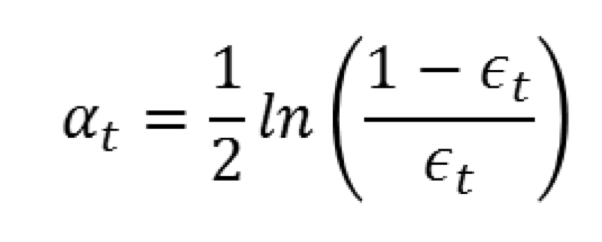

In [ ]:
Image(filename=r'weightage_to_weak_learner.png')

- Secondly, the AdaBoost algorithm directs its attention to __misclassified data examples from our first weak classifier__, by assigning weights to each data sample, the value of which is defined by whether the classifier correctly or incorrectly classified the sample.

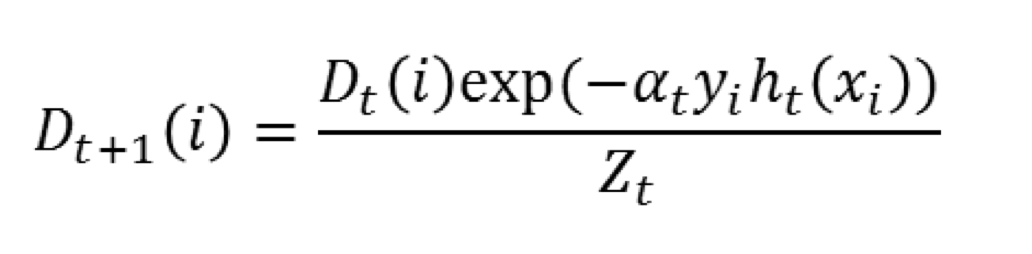

In [ ]:
Image(filename=r'adaboost_formula.png')

### Final Model

Once all of the iterations have been completed, all of the __weak learners are combined with their weights to form a strong classifier__, as expressed in the below equation:

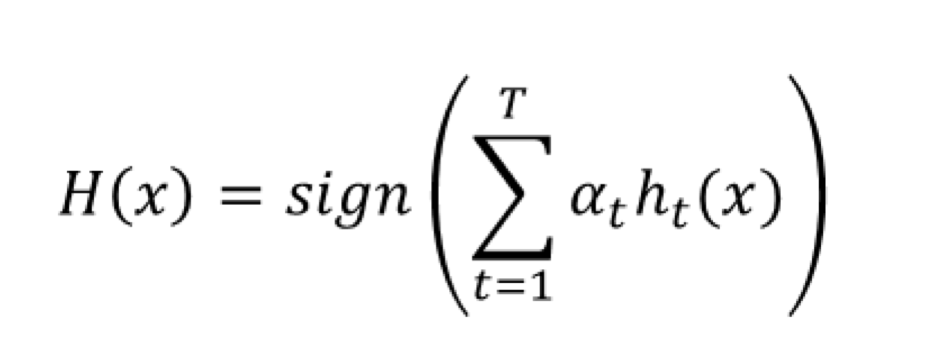

In [ ]:
Image(filename=r'final_model.png')

The final classifier is therefore __built up of “T” weak classifiers, ht(x) is the output of the weak classifier, with at the weight applied to the classifier__. 

The final output is therefore a combination of all of the classifiers.

### Build ADABOOST Classifier

1. Assign every observation, X(i), with an initial weight value, w(i) = 1/n, 
Where n is the total number of observations.
2. Train a **weak** model.
3. For each observation:
 <br>3.1. If predicted **incorrectly**, w(i) is **increased**.
 <br>3.2. If predicted **correctly**, w(i) i **decreased**.
4. Train a new weak model where observations with greater weights are given more priority.
5. Repeat steps 3 and 4 until observatons are perfectly predicted or a preset number of trees are trained. 

#### Create Adaboost Classifier

The most important parameters are base_estimator, n_estimators, and learning_rate.
-  **base_estimator** is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.
-  **n_estimators** is the number of models to iteratively train.
-  **learning_rate** is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).
-  **loss** is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.

In [ ]:
# Create adaboost-decision tree classifer object
clf_adaboost =  AdaBoostClassifier(n_estimators = 600,
    learning_rate = 0.4)

clf_adaboost.fit(X_train_std, y_train)

y_pred_train = clf_adaboost.predict(X_train_std)
y_pred_test = clf_adaboost.predict(X_test_std)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


Train Accuracy: 0.8646428571428572
Test Accuracy: 0.8417326114119117


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     0.7869    0.6819    0.7306      1273
          UE     0.8434    0.8878    0.8650      2450
           W     0.9380    0.9584    0.9481      1877

    accuracy                         0.8646      5600
   macro avg     0.8561    0.8427    0.8479      5600
weighted avg     0.8622    0.8646    0.8623      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7427    0.6569    0.6972       545
          UE     0.8306    0.8630    0.8465      1051
           W     0.9141    0.9391    0.9265       805

    accuracy                         0.8417      2401
   macro avg     0.8292    0.8197    0.8234      2401
weighted avg     0.8387    0.8417    0.8394      2401



In [ ]:
print(confusion_matrix(y_test,y_pred_test))

[[358 163  24]
 [ 97 907  47]
 [ 27  22 756]]


In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040
3,Adaboost,0.864643,0.864643,0.862238,0.862299,0.841733,0.841733,0.838662,0.839407


In [ ]:
param_grid = {'n_estimators' : [400, 500, 600],
              'learning_rate' : [0.2, 0.3, 0.4]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [ ]:
%time Adaboost_model_clf.fit(X_train_std, y_train)

# Wall time: the wall clock time.
# CPU time: the process CPU time.
# sys: the operating system CPU time due to system calls from the process.
# https://stackoverflow.com/questions/7335920/what-specifically-are-wall-clock-time-user-cpu-time-and-system-cpu-time-in-uni


CPU times: user 17.5 s, sys: 67.6 ms, total: 17.5 s
Wall time: 3min


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': [400, 500, 600]})

In [ ]:
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_) 

0.8503571428571428 {'learning_rate': 0.2, 'n_estimators': 500}


In [ ]:
best_ada_model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=500)

In [ ]:
y_pred_train = best_ada_model.predict(X_train_std)
y_pred_test = best_ada_model.predict(X_test_std)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8898214285714285
Test Accuracy: 0.8384006663890046


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     0.7891    0.7730    0.7810      1273
          UE     0.8802    0.8788    0.8795      2450
           W     0.9680    0.9835    0.9757      1877

    accuracy                         0.8898      5600
   macro avg     0.8791    0.8784    0.8787      5600
weighted avg     0.8889    0.8898    0.8893      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7109    0.7083    0.7096       545
          UE     0.8448    0.8183    0.8313      1051
           W     0.9131    0.9528    0.9325       805

    accuracy                         0.8384      2401
   macro avg     0.8229    0.8264    0.8245      2401
weighted avg     0.8373    0.8384    0.8376      2401



In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost_BestParameters",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040
3,Adaboost,0.864643,0.864643,0.862238,0.862299,0.841733,0.841733,0.838662,0.839407
4,Adaboost_BestParameters,0.889821,0.889821,0.888928,0.889335,0.838401,0.838401,0.837293,0.837612


## Build Gradient Boosting Classifier

Gradient boosting is a type of boosting. 

The key idea behind gradient boosting is to set the target outcomes for this next model in order to minimize the error. The target outcome for each case in the data set depends on how much a change in that case’s prediction impacts the overall prediction error.

If, for case X(i), a small change in the prediction causes a large drop in error, then the next target outcome is a high value. Predictions from the new model that are close to its targets will reduce the error.

If, for case X(j), a small change in the prediction causes no change in error, then the next target outcome is zero because changing this prediction does not decrease the error.

The name gradient boosting arises because of setting target outcomes based on the gradient of the error with respect to the prediction of each case. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

1. Initialize the outcome
2. Iterate from 1 to total number of trees
  <br>2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  <br>2.2 Fit the model on selected subsample of data
  <br>2.3 Make predictions on the full set of observations
  <br>2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

The most important parameters are learning_rate, n_estimators and subsample
- **learning_rate**
    -  This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    -  Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    -  Lower values would require higher number of trees to model all the relations and will be computationally expensive.
- **n_estimators**
    -  The number of sequential trees to be modeled (step 2)
    -  Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
- **subsample**
    -  The fraction of observations to be selected for each tree. Selection is done by random sampling.
    -  Values slightly less than 1 make the model robust by reducing the variance.
    -  Typical values ~0.8 generally work fine but can be fine-tuned further.

In [ ]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [ ]:
%time GBM_model.fit(X=X_train_std, y=y_train)

CPU times: user 4.3 s, sys: 17.1 ms, total: 4.32 s
Wall time: 4.36 s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [ ]:
y_pred_train = GBM_model.predict(X_train_std)
y_pred_test = GBM_model.predict(X_test_std)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9332142857142857
Test Accuracy: 0.8646397334443982


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     0.9086    0.8515    0.8792      1273
          UE     0.9264    0.9347    0.9305      2450
           W     0.9571    0.9867    0.9717      1877

    accuracy                         0.9332      5600
   macro avg     0.9307    0.9243    0.9271      5600
weighted avg     0.9326    0.9332    0.9326      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7716    0.7376    0.7542       545
          UE     0.8715    0.8649    0.8682      1051
           W     0.9140    0.9503    0.9318       805

    accuracy                         0.8646      2401
   macro avg     0.8524    0.8509    0.8514      2401
weighted avg     0.8631    0.8646    0.8636      2401



In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040
3,Adaboost,0.864643,0.864643,0.862238,0.862299,0.841733,0.841733,0.838662,0.839407
4,Adaboost_BestParameters,0.889821,0.889821,0.888928,0.889335,0.838401,0.838401,0.837293,0.837612
5,GBM,0.933214,0.933214,0.932643,0.932634,0.864640,0.864640,0.863075,0.863646


In [ ]:
# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [50,100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2,0.3]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv=5)

In [ ]:
%time CV_GBM.fit(X=X_train_std, y=y_train)

CPU times: user 29min 37s, sys: 4.88 s, total: 29min 42s
Wall time: 29min 54s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.8728571428571428 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
y_pred_train=best_gbm_model.predict(X_train_std)
y_pred_test=best_gbm_model.predict(X_test_std)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9807142857142858
Test Accuracy: 0.8713036234902124


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     0.9894    0.9497    0.9691      1273
          UE     0.9758    0.9861    0.9809      2450
           W     0.9816    0.9947    0.9881      1877

    accuracy                         0.9807      5600
   macro avg     0.9822    0.9768    0.9794      5600
weighted avg     0.9808    0.9807    0.9806      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7859    0.7339    0.7590       545
          UE     0.8727    0.8744    0.8736      1051
           W     0.9213    0.9602    0.9404       805

    accuracy                         0.8713      2401
   macro avg     0.8600    0.8562    0.8577      2401
weighted avg     0.8693    0.8713    0.8700      2401



In [ ]:
print(confusion_matrix(y_test, y_pred_test))

[[400 121  24]
 [ 90 919  42]
 [ 19  13 773]]


In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM_BestParameters",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040
3,Adaboost,0.864643,0.864643,0.862238,0.862299,0.841733,0.841733,0.838662,0.839407
4,Adaboost_BestParameters,0.889821,0.889821,0.888928,0.889335,0.838401,0.838401,0.837293,0.837612
5,GBM,0.933214,0.933214,0.932643,0.932634,0.864640,0.864640,0.863075,0.863646
6,GBM_BestParameters,0.980714,0.980714,0.980812,0.980645,0.871304,0.871304,0.869313,0.869972


### Extracting the important features

In [ ]:
best_gbm_model.feature_importances_

array([1.98329082e-03, 7.47307360e-02, 2.84314357e-01, 1.98932558e-02,
       1.88678255e-02, 2.68313889e-02, 3.49405994e-02, 6.23047766e-03,
       1.15550870e-02, 7.47324222e-03, 1.90668424e-02, 1.46790470e-02,
       4.71460649e-02, 2.10103510e-02, 2.81098264e-02, 8.43145048e-03,
       1.14681764e-01, 2.06302643e-04, 6.77459734e-04, 6.51909906e-04,
       8.58394601e-04, 1.27605385e-04, 7.03977679e-04, 8.31501909e-02,
       9.84767458e-02, 3.79418608e-02, 3.34749893e-02, 2.42793591e-04,
       6.99047209e-04, 3.91172117e-04, 4.72409760e-04, 5.80861706e-04,
       2.59994085e-04, 1.96789188e-04, 1.72286131e-04, 3.48184047e-04,
       4.21418763e-04])

In [ ]:
importances = best_gbm_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[21 34 33 17 27 32 35 29 36 30 31 19 18 28 22 20  0  7  9 15  8 11  4 10
  3 13  5 14 26  6 25 12  1 23 24 16  2]


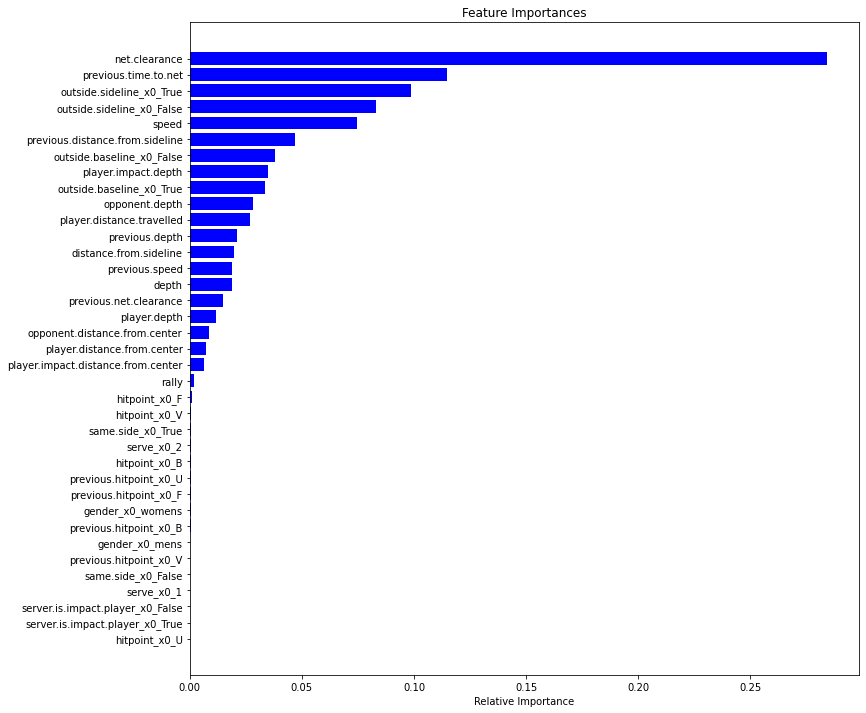

In [ ]:
%matplotlib inline
features = X_train_std.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
indices = np.argsort(importances)[::-1] # np.argsort returns the indices that would sort an array.
pd.DataFrame([X_train_std.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,net.clearance,previous.time.to.net,outside.sideline_x0_True,outside.sideline_x0_False,speed,previous.distance.from.sideline,outside.baseline_x0_False,player.impact.depth,outside.baseline_x0_True,opponent.depth,...,previous.hitpoint_x0_F,gender_x0_womens,previous.hitpoint_x0_B,gender_x0_mens,previous.hitpoint_x0_V,same.side_x0_False,serve_x0_1,server.is.impact.player_x0_False,server.is.impact.player_x0_True,hitpoint_x0_U
1,0.284314,0.114682,0.098477,0.08315,0.074731,0.047146,0.037942,0.034941,0.033475,0.02811,...,0.000472,0.000421,0.000391,0.000348,0.00026,0.000243,0.000206,0.000197,0.000172,0.000128


### Build XGBOOST Classifier
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.

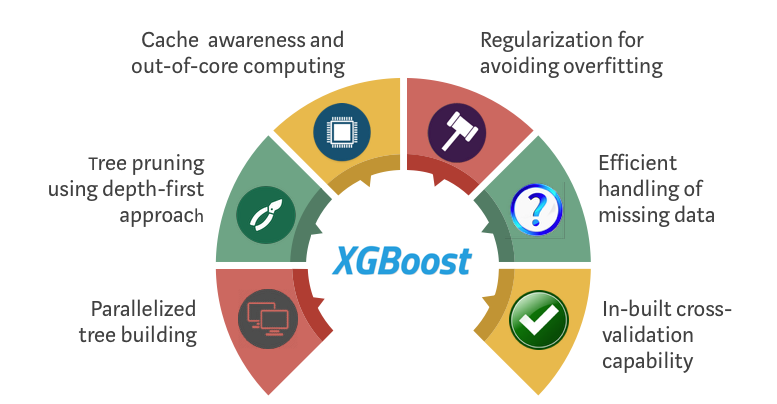

In [ ]:
Image(filename=r'xgboost.png') 

#### The XGBoost Advantages
-  Regularization:
    -  Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
    -  In fact, XGBoost is also known as ‘regularized boosting‘ technique.
-  Parallel Processing:
    -  XGBoost implements parallel processing and is blazingly faster as compared to GBM.
    -  Boosting is sequential process that each tree can be built only after the previous one, and it  can be parallelized with making a tree using all cores.
    
    -  XGBoost also supports implementation on Hadoop.
-  High Flexibility
    -  XGBoost allow users to define custom optimization objectives and evaluation criteria.
    -  This adds a whole new dimension to the model and there is no limit to what we can do.
-  Handling Missing Values
    -  XGBoost has an in-built routine to handle missing values.
    -  User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
-  Tree Pruning:
    -  A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
    -  XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    -  Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
-  Built-in Cross-Validation
    -  XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    -  This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
-  Continue on Existing Model
    -  User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
    -  GBM implementation of sklearn also has this feature so they are even on this point.

#### Create XGBoost Classifier

There are different hyperparameters that we can tune and the parametres are different from baselearner to baselearner. 
<br>In tree based learners, which are the most common ones in xgboost applications, the following are the most commonly tuned hyperparameters:

-  **learning rate/eta:** governs how quickly the model fits the residual error using additional base learners. If it is a smaller learning rate, it will need more boosting rounds, hence more time, to achieve the same reduction in residual error as one with larger learning rate. Typically, it lies between 0.01 – 0.3
-  **max_depth:** max depth per tree. This controls how deep our tree can grow. The Larger the depth, more complex the model will be and higher chances of overfitting. Larger data sets require deep trees to learn the rules from data. Default = 6.
-  **subsample:** % samples used per tree. This is the fraction of the total training set that can be used in any boosting round. Low value may lead to underfitting issues. A very high value can cause over-fitting problems.
-  **colsample_bytree:** % features used per tree. This is the fraction of the number of columns that we can use in any boosting round. A smaller value is an additional regularization and a larger value may be cause overfitting issues.
-  **n_estimators:** number of estimators (base learners). This is the number of boosting rounds.
<br><br>The three hyperparameters below are regularization hyperparameters.
-  **gamma:** min loss reduction to create new tree split. default = 0 means no regularization.
-  **lambda:** L2 reg on leaf weights. Equivalent to Ridge regression.
-  **alpha:** L1 reg on leaf weights. Equivalent to Lasso regression.


Refer: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train_std, y_train)

[18:52:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 33.1 s, sys: 376 ms, total: 33.5 s
Wall time: 8.73 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_train = XGB_model.predict(X_train_std)
y_pred_test = XGB_model.predict(X_test_std)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9969642857142857
Test Accuracy: 0.8629737609329446


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     1.0000    0.9890    0.9945      1273
          UE     0.9955    0.9988    0.9971      2450
           W     0.9968    1.0000    0.9984      1877

    accuracy                         0.9970      5600
   macro avg     0.9974    0.9959    0.9967      5600
weighted avg     0.9970    0.9970    0.9970      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7683    0.7303    0.7488       545
          UE     0.8661    0.8677    0.8669      1051
           W     0.9181    0.9466    0.9321       805

    accuracy                         0.8630      2401
   macro avg     0.8508    0.8482    0.8493      2401
weighted avg     0.8613    0.8630    0.8620      2401



In [ ]:
np.linspace(0.6, 0.8, 2)

array([0.6, 0.8])

In [ ]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100,200],
     'max_depth': [5, 10]
}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [ ]:
%time CV_XGB.fit(X = X_train_std, y=y_train)

[18:52:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [ ]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.874642857142857 {'colsample_bytree': 0.8, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_train=best_xgb_model.predict(X_train_std)
y_pred_test=best_xgb_model.predict(X_test_std)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9992857142857143
Test Accuracy: 0.8717201166180758


In [ ]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          FE     1.0000    0.9976    0.9988      1273
          UE     0.9992    0.9996    0.9994      2450
           W     0.9989    1.0000    0.9995      1877

    accuracy                         0.9993      5600
   macro avg     0.9994    0.9991    0.9992      5600
weighted avg     0.9993    0.9993    0.9993      5600


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          FE     0.7891    0.7413    0.7644       545
          UE     0.8710    0.8801    0.8755      1051
           W     0.9238    0.9491    0.9363       805

    accuracy                         0.8717      2401
   macro avg     0.8613    0.8568    0.8587      2401
weighted avg     0.8701    0.8717    0.8707      2401



In [ ]:
print(confusion_matrix(y_test, y_pred_test))

[[404 117  24]
 [ 87 925  39]
 [ 21  20 764]]


In [ ]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBoost_BestParameters",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040
3,Adaboost,0.864643,0.864643,0.862238,0.862299,0.841733,0.841733,0.838662,0.839407
4,Adaboost_BestParameters,0.889821,0.889821,0.888928,0.889335,0.838401,0.838401,0.837293,0.837612
5,GBM,0.933214,0.933214,0.932643,0.932634,0.864640,0.864640,0.863075,0.863646
6,GBM_BestParameters,0.980714,0.980714,0.980812,0.980645,0.871304,0.871304,0.869313,0.869972
7,XGBoost_BestParameters,0.999286,0.999286,0.999286,0.999286,0.871720,0.871720,0.870110,0.870678


### Extracting the important features

In [ ]:
best_xgb_model.feature_importances_

array([0.00451389, 0.02337112, 0.04629776, 0.00938947, 0.01204804,
       0.00988241, 0.01463567, 0.00497172, 0.00588962, 0.00468886,
       0.0133093 , 0.0064831 , 0.01312216, 0.00809652, 0.01500118,
       0.00473974, 0.02692516, 0.00562994, 0.00809612, 0.00905169,
       0.00558816, 0.00176196, 0.00930663, 0.18276478, 0.1471922 ,
       0.08598205, 0.10322192, 0.0062981 , 0.00225424, 0.00505981,
       0.00533914, 0.00691864, 0.17488043, 0.00368253, 0.00387245,
       0.00477413, 0.00495943], dtype=float32)

In [ ]:
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[21 28 33 34  0  9 15 35 36  7 29 30 20 17  8 27 11 31 18 13 19 22  3  5
  4 12 10  6 14  1 16  2 25 26 24 32 23]


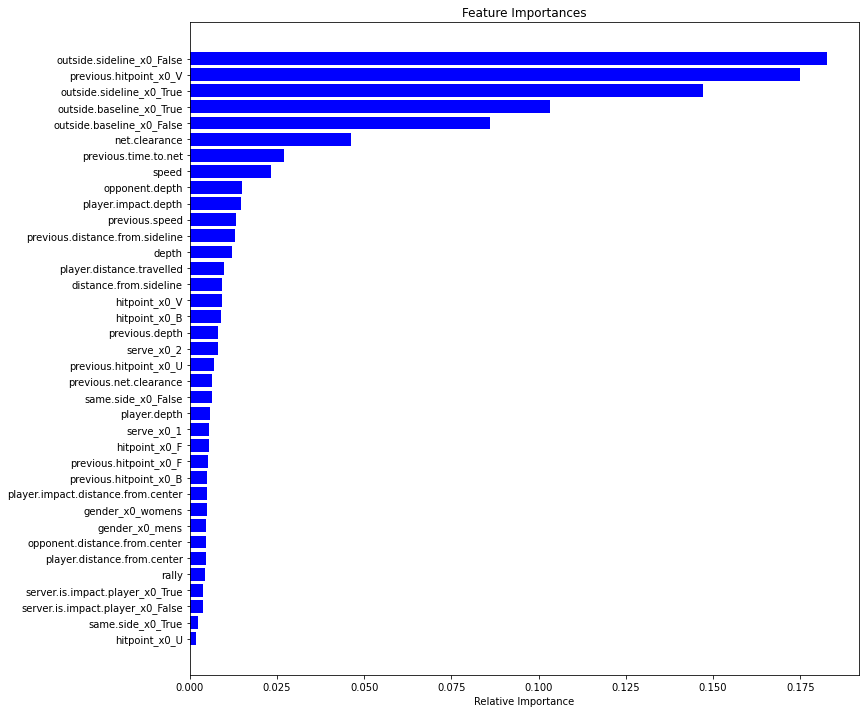

In [ ]:
%matplotlib inline
features = X_train_std.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
indices = np.argsort(importances)[::-1] # np.argsort returns the indices that would sort an array.
pd.DataFrame([X_train_std.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,outside.sideline_x0_False,previous.hitpoint_x0_V,outside.sideline_x0_True,outside.baseline_x0_True,outside.baseline_x0_False,net.clearance,previous.time.to.net,speed,opponent.depth,player.impact.depth,...,player.impact.distance.from.center,gender_x0_womens,gender_x0_mens,opponent.distance.from.center,player.distance.from.center,rally,server.is.impact.player_x0_True,server.is.impact.player_x0_False,same.side_x0_True,hitpoint_x0_U
1,0.182765,0.17488,0.147192,0.103222,0.085982,0.046298,0.026925,0.023371,0.015001,0.014636,...,0.004972,0.004959,0.004774,0.00474,0.004689,0.004514,0.003872,0.003683,0.002254,0.001762


In [ ]:
!pip install vecstack
from vecstack import stacking

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
models = [clf_dt,clf_rf,clf_adaboost]

### Stacking:

__The stacking function takes several inputs:__

* models: the first level models we defined earlier
* X_train, y_train, X_test: our data
* regression: Boolean indicating whether we want to use the function for regression. In our case its set to False, since this is a classification
* mode: using the earlier describe out-of-fold during cross-validation
* needs_proba: Boolean indicating whether you need the probabilities of class labels
* save_dir: save the result to directory Boolean
* metric: what evaluation metric to use (we imported the accuracy_score in the beginning)
* n_folds: how many folds to use for cross-validation
* stratified: whether to use stratified cross-validation
* shuffle: whether to shuffle the data
* random_state: setting a random state for reproducibility
* verbose: 2 here refers to printing all info


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [ ]:
y_train.head()

1402    UE
1544     W
1764    FE
5718     W
7006    UE
Name: outcome, dtype: category
Categories (3, object): ['FE', 'UE', 'W']

In [ ]:
y_train1 = le.transform(y_train)

In [ ]:
y_train1
# 0 - Forced Error, 1 - Unforced Error, 2 - Winner

array([1, 2, 0, ..., 1, 1, 0])

In [ ]:
y_test.head()

2949    UE
6885     W
3079     W
6548    UE
5886     W
Name: outcome, dtype: category
Categories (3, object): ['FE', 'UE', 'W']

In [ ]:
y_test1 = le.transform(y_test)

In [ ]:
y_test1
# 0 - Forced Error, 1 - Unforced Error, W - Winner

array([1, 2, 2, ..., 2, 1, 1])

In [ ]:
S_train, S_test = stacking(models,                   
                           X_train_std, y_train1, X_test_std,   
                           regression=False,  
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.78500000]
    fold  1:  [0.76428571]
    fold  2:  [0.78785714]
    fold  3:  [0.78857143]
    ----
    MEAN:     [0.78142857] + [0.00998724]
    FULL:     [0.78142857]

model  1:     [RandomForestClassifier]
    fold  0:  [0.85142857]
    fold  1:  [0.85714286]
    fold  2:  [0.87571429]
    fold  3:  [0.87071429]
    ----
    MEAN:     [0.86375000] + [0.00983765]
    FULL:     [0.86375000]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.83642857]
    fold  1:  [0.83928571]
    fold  2:  [0.86142857]
    fold  3:  [0.83142857]
    ----
    MEAN:     [0.84214286] + [0.01148424]
    FULL:     [0.84214286]



In [ ]:
model = GradientBoostingClassifier(random_state=0, 
                           n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train1)
y_pred_train=model.predict(S_train)
y_pred_test = model.predict(S_test)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train1,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test1,y_pred_test))

Train Accuracy: 0.8667857142857143
Test Accuracy: 0.8646397334443982


### Performance Metric for all the Models

In [ ]:
scores = get_metrics(y_train1,y_pred_train,y_test1,y_pred_test,"Stacking",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.788929,0.788929,0.793717,0.784182,0.763848,0.763848,0.766224,0.758200
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.863807,0.863807,0.861726,0.862218
2,RandomForest_BestParameters,0.951250,0.951250,0.951641,0.950930,0.853394,0.853394,0.850588,0.851040
3,Adaboost,0.864643,0.864643,0.862238,0.862299,0.841733,0.841733,0.838662,0.839407
4,Adaboost_BestParameters,0.889821,0.889821,0.888928,0.889335,0.838401,0.838401,0.837293,0.837612
5,GBM,0.933214,0.933214,0.932643,0.932634,0.864640,0.864640,0.863075,0.863646
6,GBM_BestParameters,0.980714,0.980714,0.980812,0.980645,0.871304,0.871304,0.869313,0.869972
7,XGBoost_BestParameters,0.999286,0.999286,0.999286,0.999286,0.871720,0.871720,0.870110,0.870678
8,Stacking,0.866786,0.866786,0.864773,0.865057,0.864640,0.864640,0.862909,0.863480


### Conclusion:

__Stacking__ gave the best results as compared to all the other algorithms we tried. 

## Key Learnings

    * Confusion Matrix on Multi-class classification
    * DataFrameMapper
    * Adaboost algorithm
    * Gradient Boosting Classifier
    * XGBoost
    * Stacking

### References: 
* https://github.com/scikit-learn-contrib/sklearn-pandas
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
* https://pydotplus.readthedocs.io/reference.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* https://xgboost.readthedocs.io/en/latest/python/python_api.html
* https://github.com/vecxoz/vecstack

In [ ]:
########################################################## END ######################################################